In [2]:
from dataset import Dataset
from runner import Runner
from model_lgbm import ModelLGBM
import matplotlib.pyplot as plt
import lightgbm as lgb
import pandas as pd

In [3]:
plt.rcParams["font.size"] = 18

In [4]:
prms = {
  'num_round': 10000,
  'early_stopping_rounds': 10,
  'task': 'train',
  'boosting_type': 'gbdt',
  'objective': 'regression',
  'metrics': 'huber',
  'num_leaves': 30,
  'learning_rate': 0.3,
  'verbosity': -1,
  'verbose_eval': -1,
  'verbose_early': 0,
}
features = [
    'target','最高気温', '平均気温', '最低気温', '平均湿度',
    '平均現地気圧', '平均蒸気圧', '平均雲量', '平均風速', '日照時間'
]
train_years = [
    #[2008, 2009],
    [2010, 2011],
    [2012, 2013],
    [2014, 2015],
    [2016, 2017],
    ]
test_years = [2018, 2019]

In [5]:
def get_all_multipy_names(multipy_num, feature_names):
    def multipy(target_num, require_least_num, names):
        if target_num == multipy_num:
            name = names[0]
            for i in range(1, multipy_num):
                name += '_x_' + names[i]
            return name
        for i in range(require_least_num, len(feature_names)):
            if feature_names[i] == 'target':
                continue
            result = multipy(target_num + 1, i + 1, names + [feature_names[i]])
            if result is not None:
                all_feature_names.append(result)
    all_feature_names = []
    multipy(0, 0, [])
    return all_feature_names

In [6]:
feature_names = features.copy()
for i in range(2, 7):
    names = get_all_multipy_names(i, feature_names)
    features += names
features += ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [9]:
features

['target',
 '最高気温',
 '平均気温',
 '最低気温',
 '平均湿度',
 '平均現地気圧',
 '平均蒸気圧',
 '平均雲量',
 '平均風速',
 '日照時間',
 '最高気温_x_平均気温',
 '最高気温_x_最低気温',
 '最高気温_x_平均湿度',
 '最高気温_x_平均現地気圧',
 '最高気温_x_平均蒸気圧',
 '最高気温_x_平均雲量',
 '最高気温_x_平均風速',
 '最高気温_x_日照時間',
 '平均気温_x_最低気温',
 '平均気温_x_平均湿度',
 '平均気温_x_平均現地気圧',
 '平均気温_x_平均蒸気圧',
 '平均気温_x_平均雲量',
 '平均気温_x_平均風速',
 '平均気温_x_日照時間',
 '最低気温_x_平均湿度',
 '最低気温_x_平均現地気圧',
 '最低気温_x_平均蒸気圧',
 '最低気温_x_平均雲量',
 '最低気温_x_平均風速',
 '最低気温_x_日照時間',
 '平均湿度_x_平均現地気圧',
 '平均湿度_x_平均蒸気圧',
 '平均湿度_x_平均雲量',
 '平均湿度_x_平均風速',
 '平均湿度_x_日照時間',
 '平均現地気圧_x_平均蒸気圧',
 '平均現地気圧_x_平均雲量',
 '平均現地気圧_x_平均風速',
 '平均現地気圧_x_日照時間',
 '平均蒸気圧_x_平均雲量',
 '平均蒸気圧_x_平均風速',
 '平均蒸気圧_x_日照時間',
 '平均雲量_x_平均風速',
 '平均雲量_x_日照時間',
 '平均風速_x_日照時間',
 '最高気温_x_平均気温_x_最低気温',
 '最高気温_x_平均気温_x_平均湿度',
 '最高気温_x_平均気温_x_平均現地気圧',
 '最高気温_x_平均気温_x_平均蒸気圧',
 '最高気温_x_平均気温_x_平均雲量',
 '最高気温_x_平均気温_x_平均風速',
 '最高気温_x_平均気温_x_日照時間',
 '最高気温_x_最低気温_x_平均湿度',
 '最高気温_x_最低気温_x_平均現地気圧',
 '最高気温_x_最低気温_x_平均蒸気圧',
 '最高気温_x_最低気温_x_平均雲量',
 '最高気温_x_最低気温_x_平均風速',
 '最高気温_x_最低気温_x_日照時間',


[2019-11-25 21:27:21] - test - start training cv
[2019-11-25 21:27:21] - test fold 0 - start training
[2019-11-25 21:27:22] - test fold 0 - end training - score 13.925000342648449
[2019-11-25 21:27:22] - test fold 1 - start training
[2019-11-25 21:27:23] - test fold 1 - end training - score 15.759795163566212
[2019-11-25 21:27:23] - test fold 2 - start training
[2019-11-25 21:27:24] - test fold 2 - end training - score 10.553648772617818
[2019-11-25 21:27:24] - test fold 3 - start training
[2019-11-25 21:27:24] - test fold 3 - end training - score 7.999884619076008
[2019-11-25 21:27:24] - test - end training cv
name:test
	score:12.059582224477122
	score0:13.925000342648449
	score1:15.759795163566212
	score2:10.553648772617818
	score3:7.999884619076008
[2019-11-25 21:27:24] - test - start predicting cv
[2019-11-25 21:27:25] - test - start prediction fold:0
[2019-11-25 21:27:25] - test - end prediction fold:0 - score 24.669699741143997
[2019-11-25 21:27:25] - test - start prediction fold

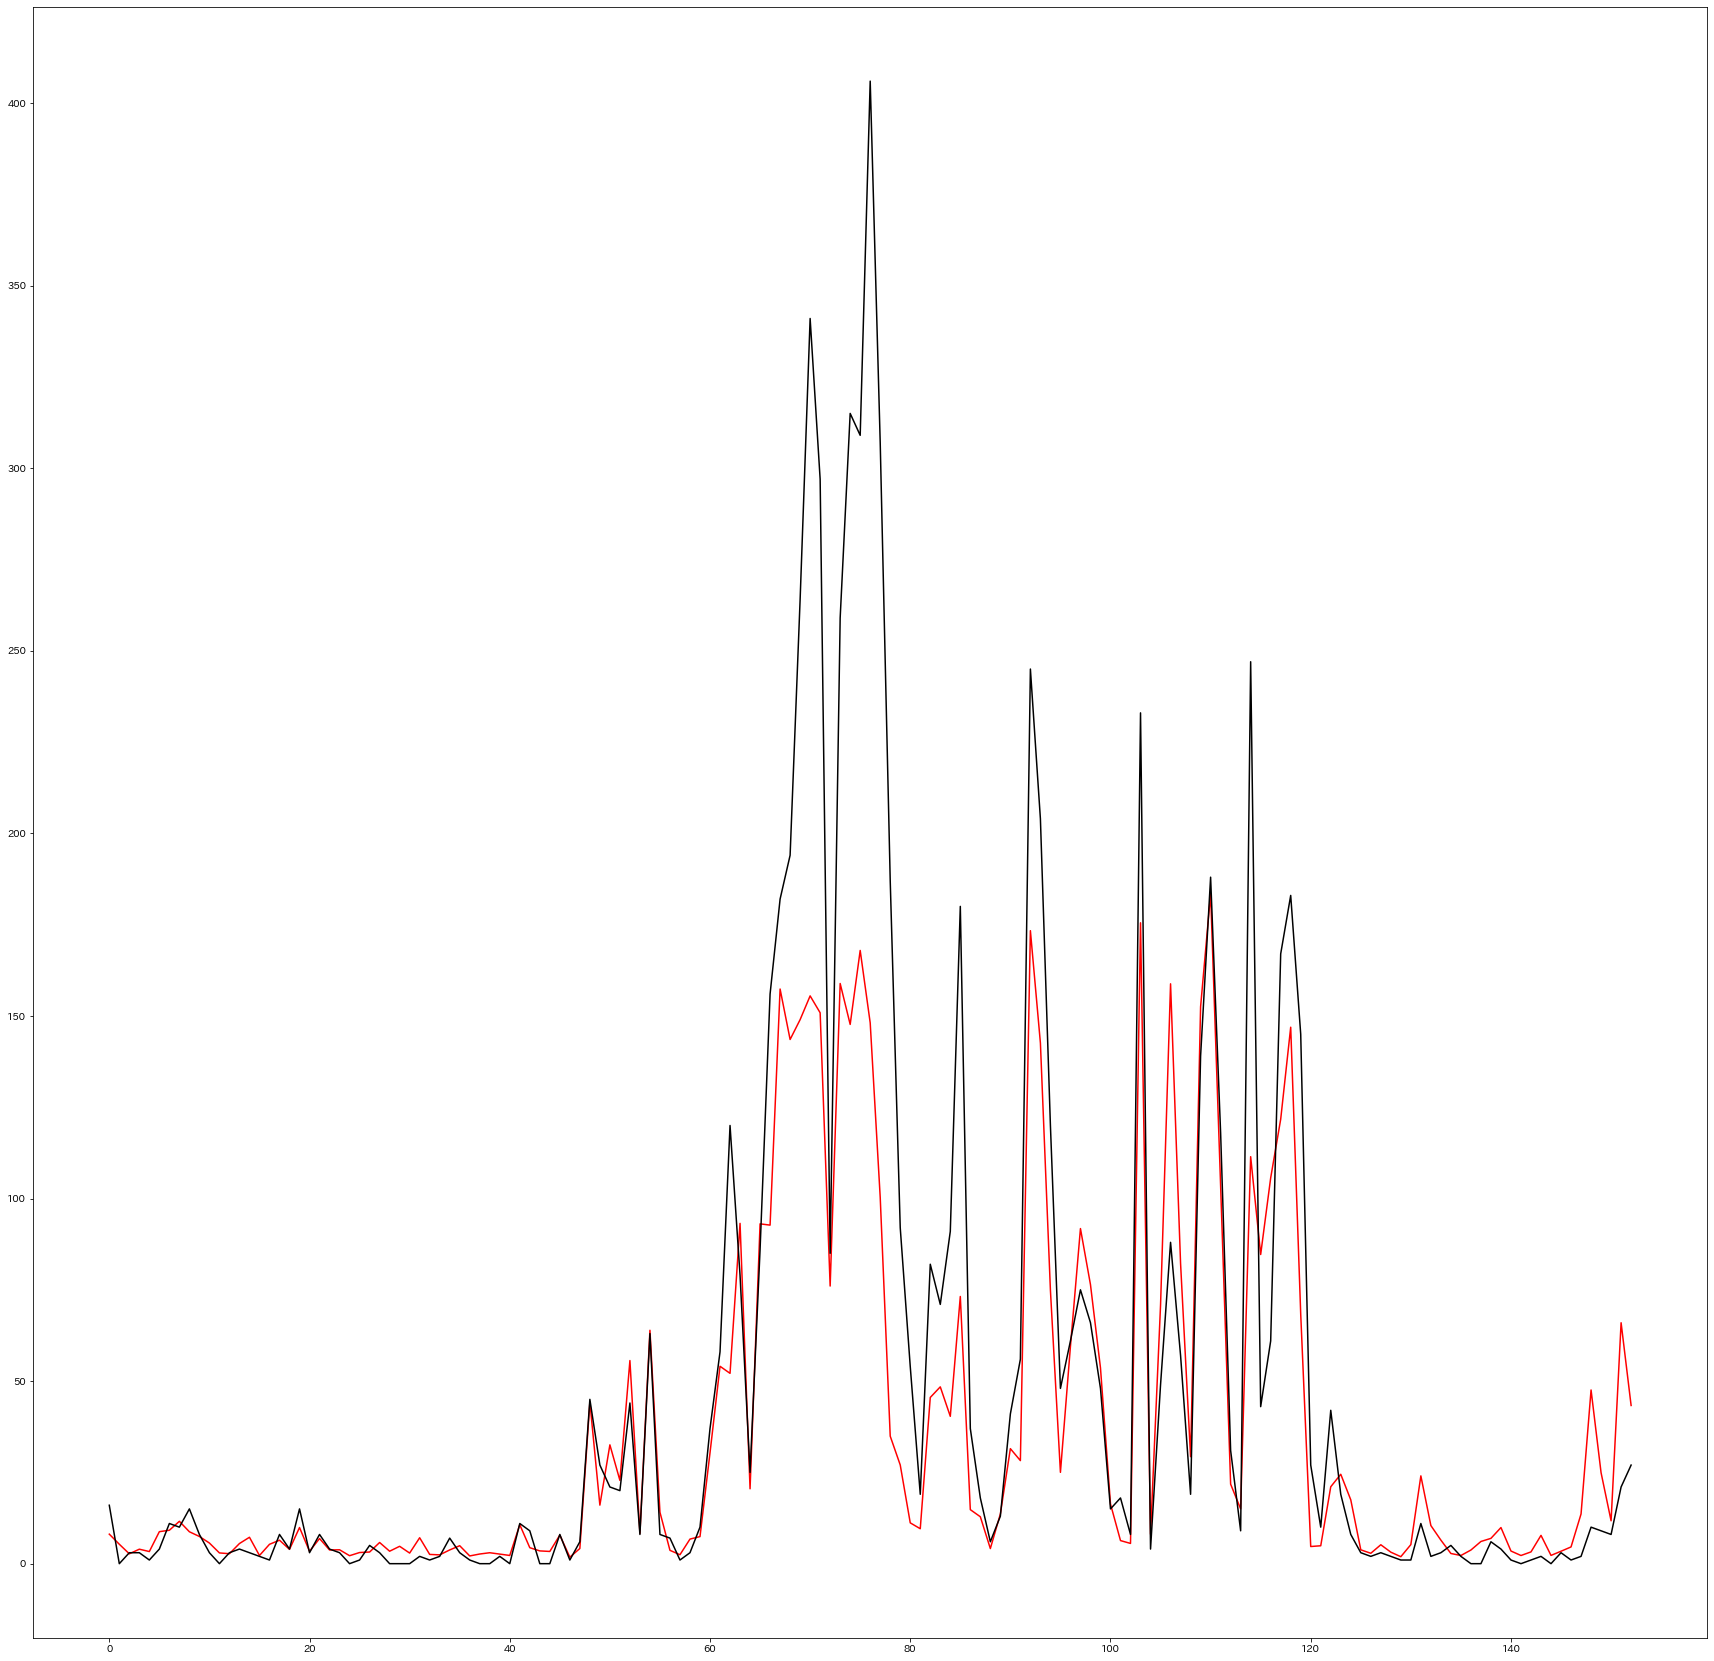

In [7]:
dataset = Dataset(features)
#dataset.add_past_day_data([i for i in range(1, 4)])

runner = Runner('test', ModelLGBM, dataset, train_years, test_years, prms)

runner.run_train_cv()
runner.run_predict_cv()

%matplotlib inline
pred, correct,_ = runner.get_predict_cv()
plt.figure(figsize=(30, 30))
plt.plot(pred, color='r')

plt.plot(correct.values, color='black')
plt.show()

<Figure size 14400x14400 with 0 Axes>

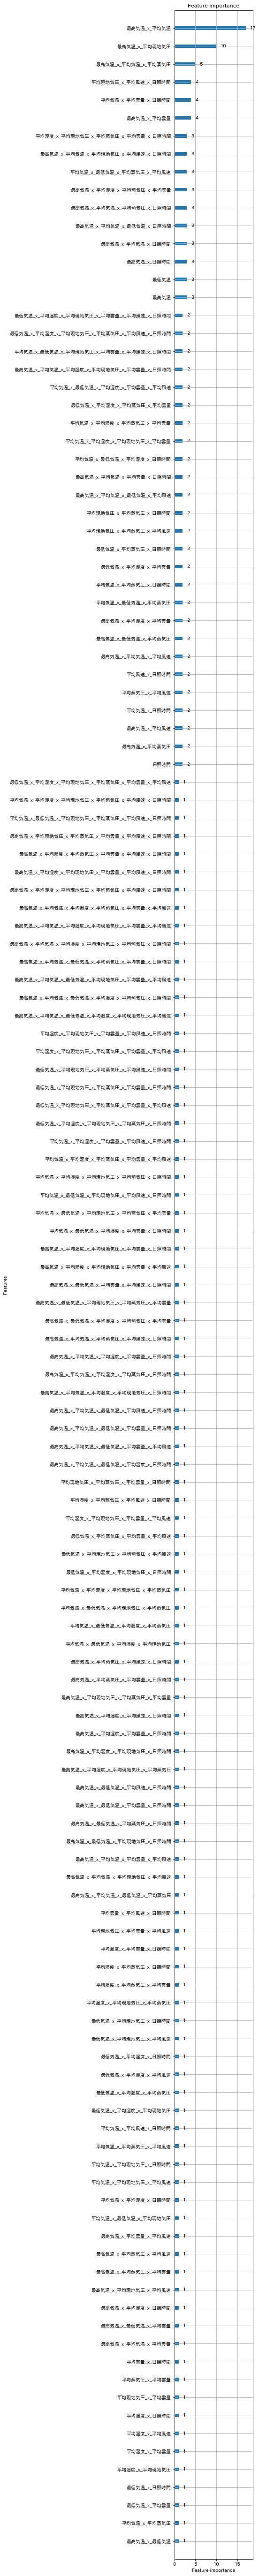

In [11]:
# 特徴量の重要度をプロットする
model = ModelLGBM('test-3', features)
model.load_model()
plt.figure(figsize=(200, 200))
lgb.plot_importance(model.model, figsize=(3, 100))
plt.savefig('data.png')

[2019-11-25 21:12:33] - test - start training cv
[2019-11-25 21:12:33] - test fold 0 - start training
[2019-11-25 21:12:33] - test fold 0 - end training - score 13.428707974479059
[2019-11-25 21:12:33] - test fold 1 - start training
[2019-11-25 21:12:33] - test fold 1 - end training - score 16.04071891152308
[2019-11-25 21:12:33] - test fold 2 - start training
[2019-11-25 21:12:33] - test fold 2 - end training - score 11.0293538808982
[2019-11-25 21:12:33] - test fold 3 - start training
[2019-11-25 21:12:33] - test fold 3 - end training - score 7.926127975234073
[2019-11-25 21:12:33] - test - end training cv
name:test
	score:12.106227185533603
	score0:13.428707974479059
	score1:16.04071891152308
	score2:11.0293538808982
	score3:7.926127975234073
[2019-11-25 21:12:33] - test - start predicting cv
[2019-11-25 21:12:33] - test - start prediction fold:0
[2019-11-25 21:12:33] - test - end prediction fold:0 - score 23.95750028943013
[2019-11-25 21:12:33] - test - start prediction fold:1
[201

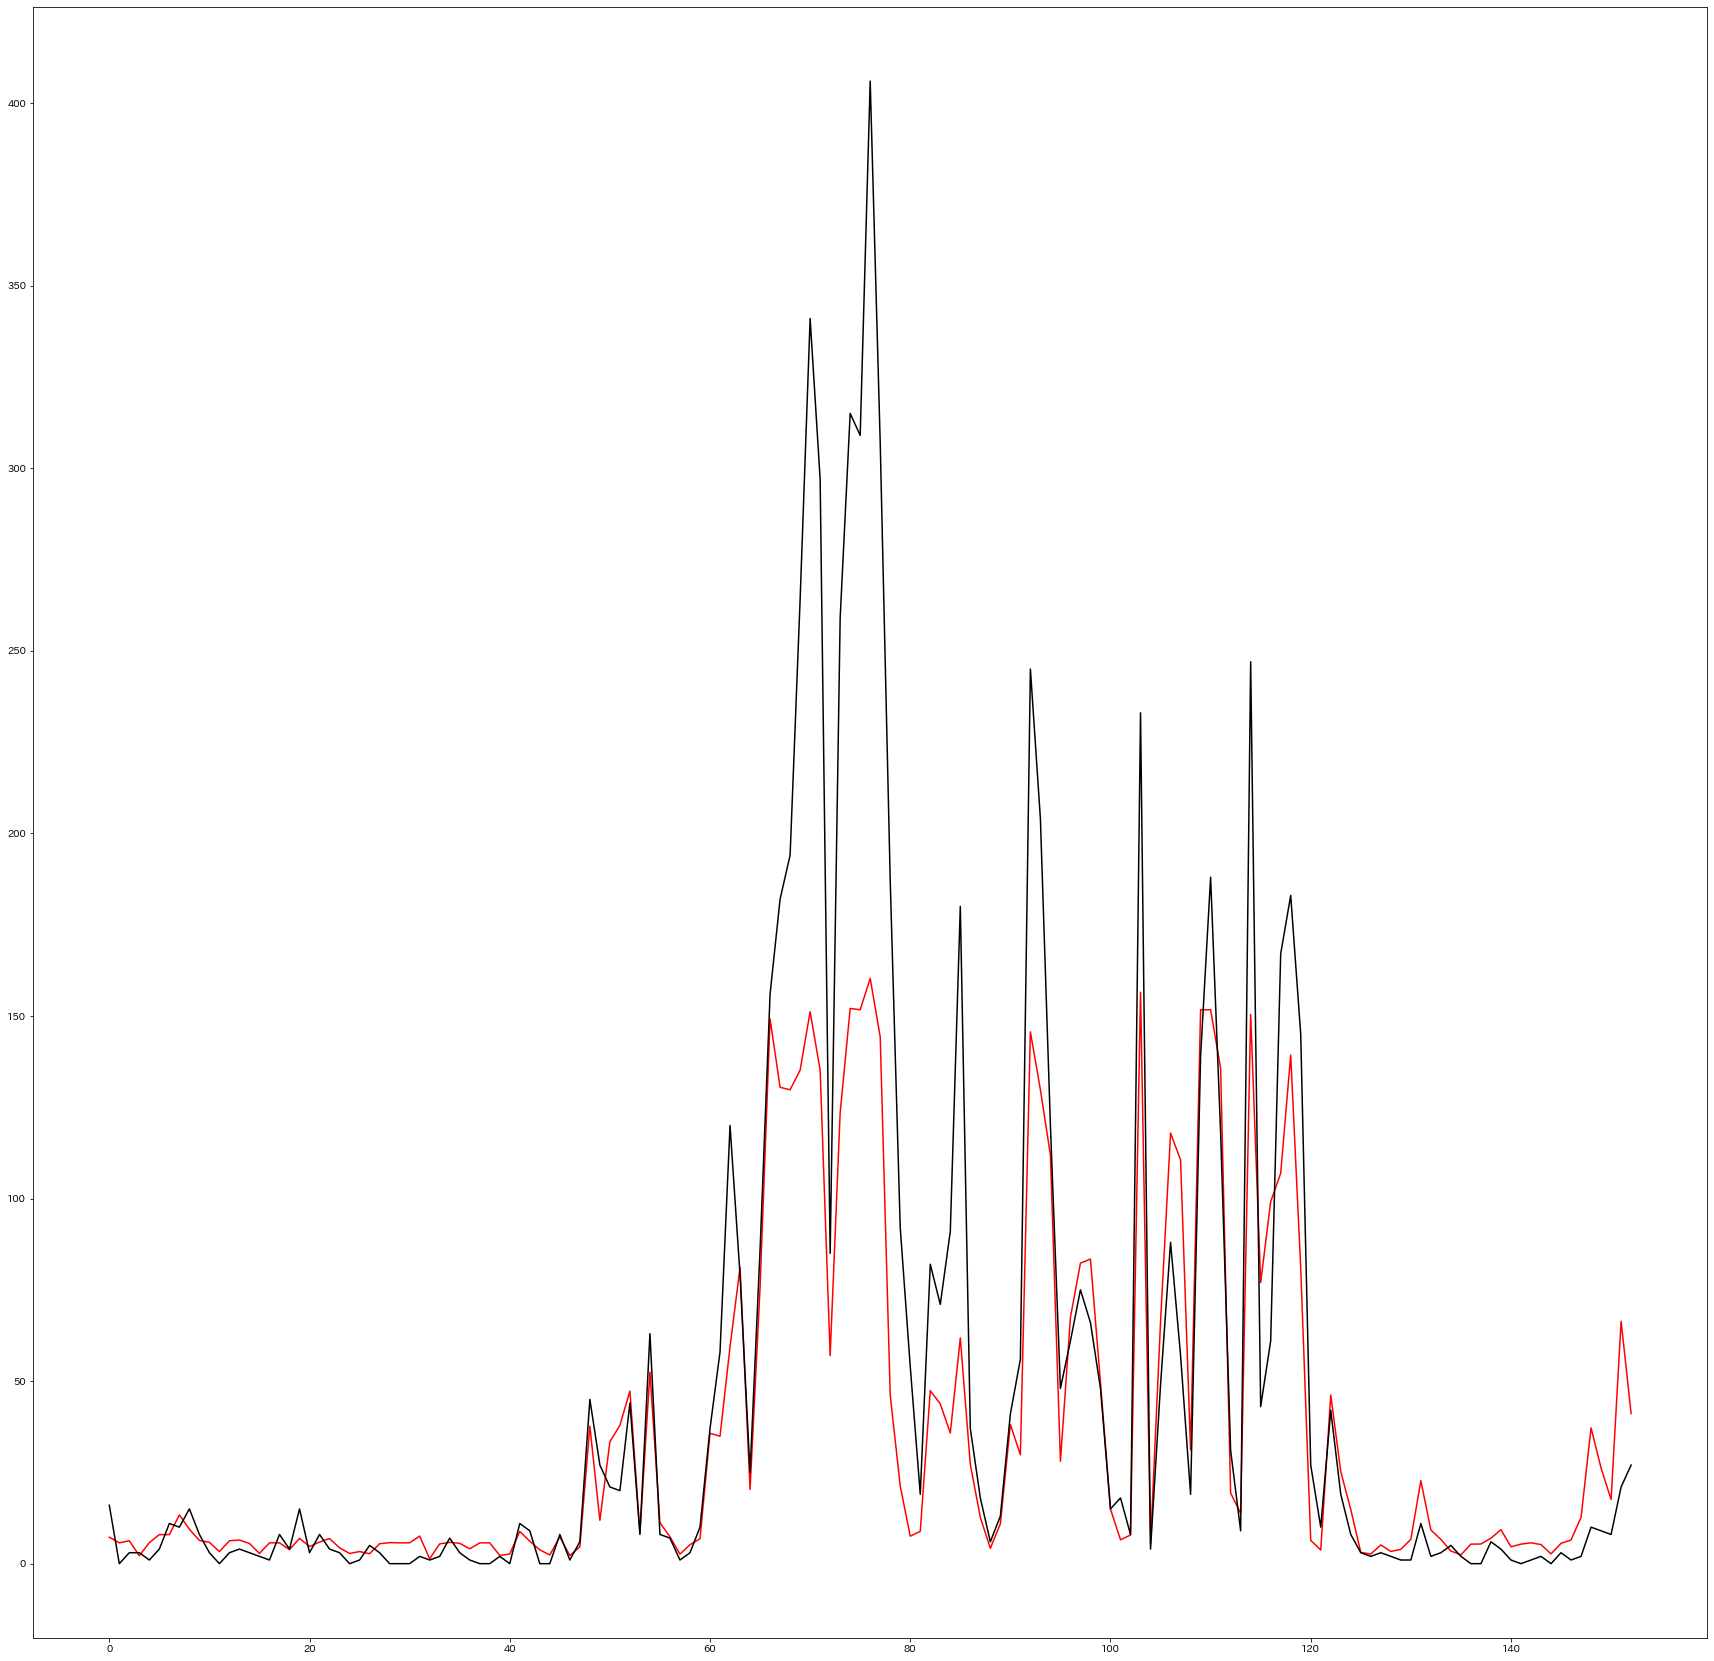

In [14]:
features = [
    '最高気温',
    '最高気温_x_平均気温',
    '最高気温_x_平均気温_x_平均蒸気圧',
    'target'
]

dataset = Dataset(features)

runner = Runner('test', ModelLGBM, dataset, train_years, test_years, prms)

runner.run_train_cv()
runner.run_predict_cv()

%matplotlib inline
pred, correct,_ = runner.get_predict_cv()
plt.figure(figsize=(30, 30))
plt.plot(pred, color='r')

plt.plot(correct.values, color='black')
plt.show()

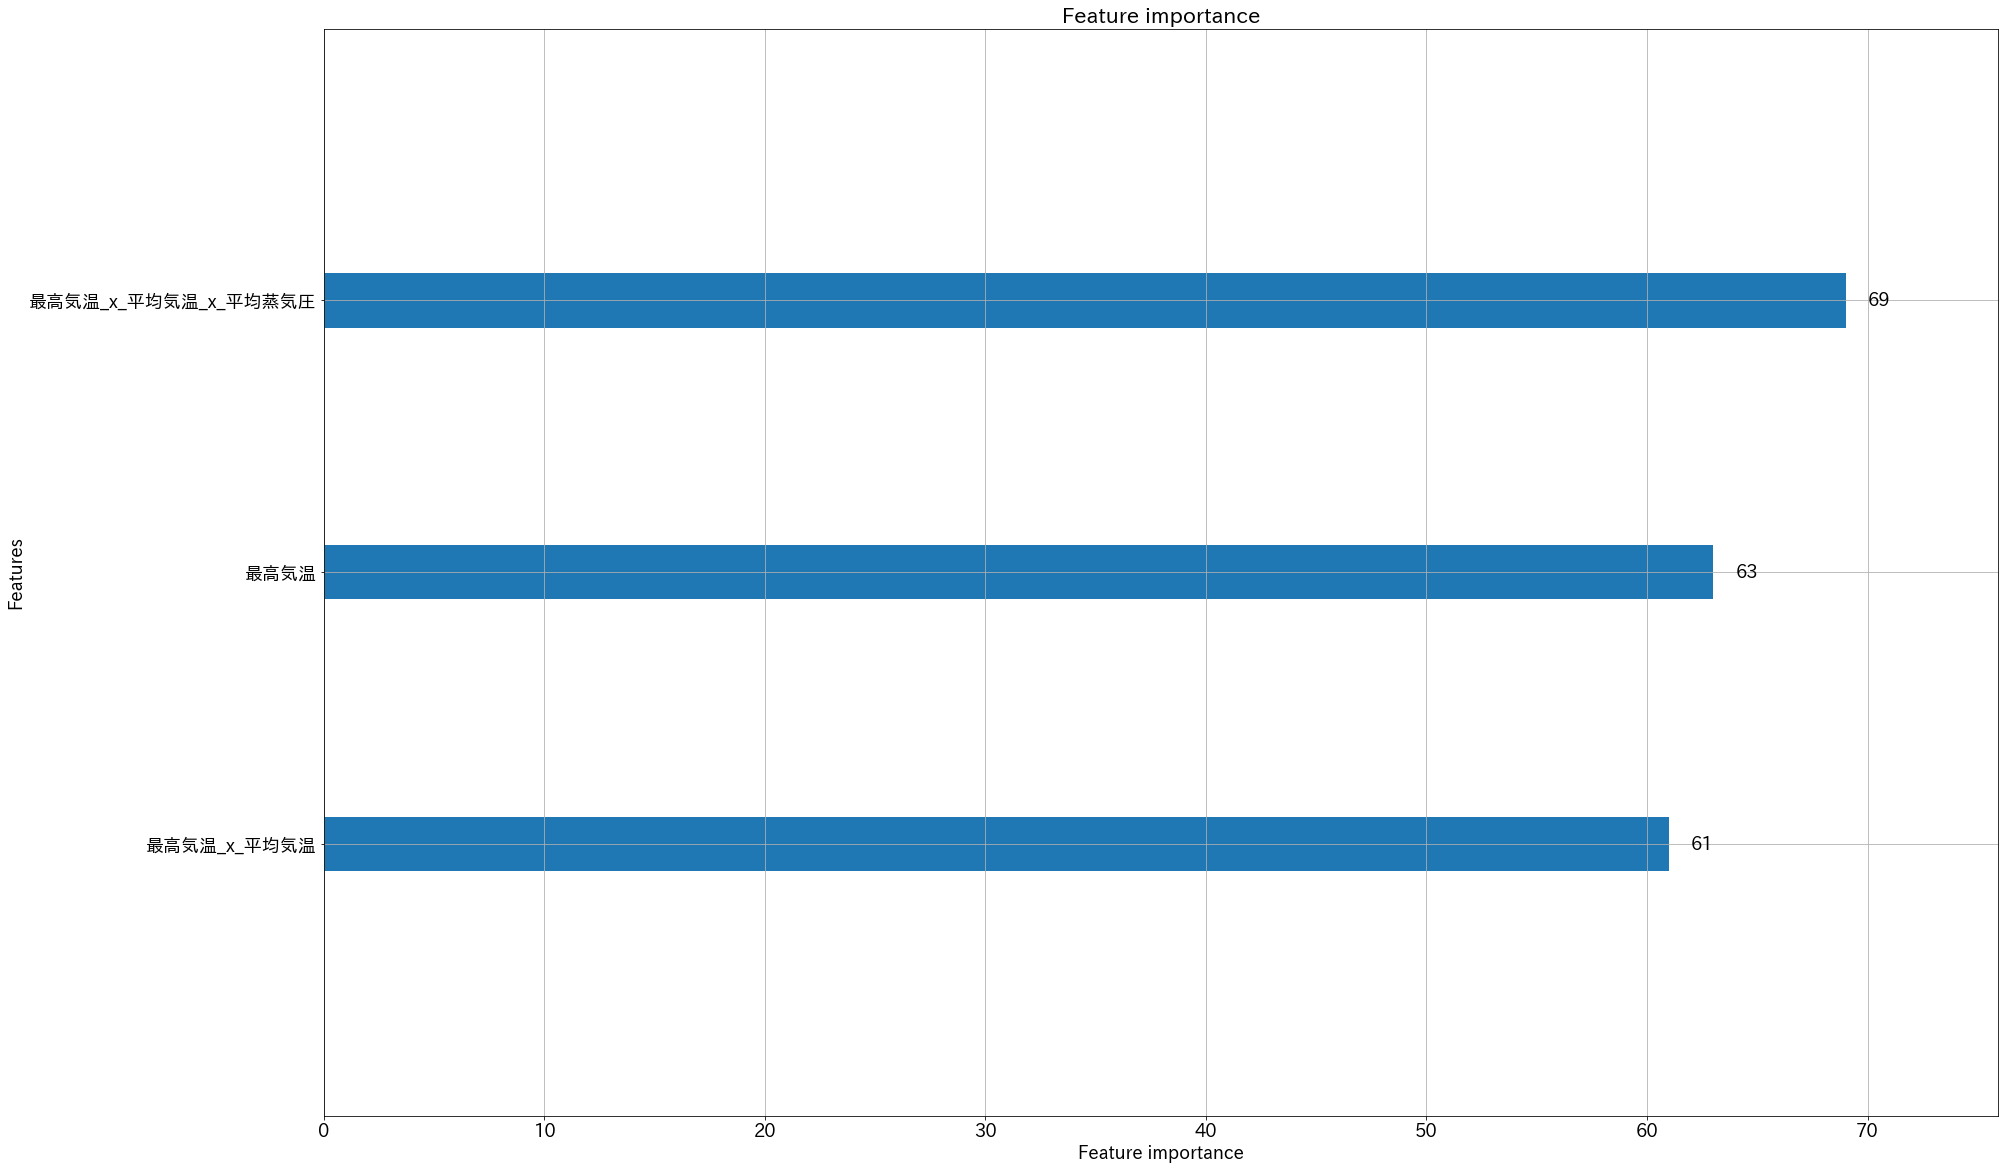

In [20]:
# 特徴量の重要度をプロットする
model = ModelLGBM('test-3', features)
model.load_model()
lgb.plot_importance(model.model, figsize=(30, 20))
plt.savefig('data.png')